In [1]:
from google.colab import drive # 드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os # 데이터 셋 확인

root = '/content/drive/MyDrive/Colab Notebooks'
print("─── Colab Notebooks 내부 파일 목록 ───")
print(os.listdir(root))

─── Colab Notebooks 내부 파일 목록 ───
['Untitled0.ipynb', 'titanic_train.csv', '타이타닉 시각화_5-7일.ipynb']


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/titanic_train.csv'

data = pd.read_csv(file_path)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # 결측치 확인

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
data[['Age', 'Cabin']].isnull().mean() # 결측치 비율 확인

,0
Age,0.198653
Cabin,0.771044


In [6]:
 data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True) # 생존과 관련없는 컬럼 제거

In [7]:
data.info() # 제거 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


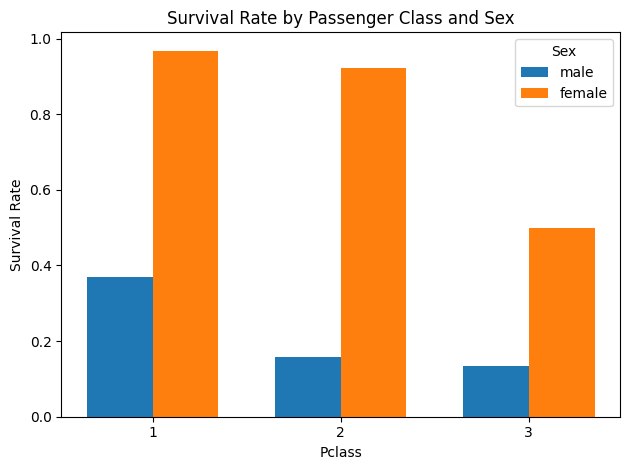

In [10]:
import numpy as np # x 좌표 계산에 활용
import matplotlib.pyplot as plt # 시각화 도구

# --- 생존률 계산
survival_rates = data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# --- 데이터 정리
classes = survival_rates.index.tolist()
male_rates = survival_rates['male'].tolist()
female_rates = survival_rates['female'].tolist()
x = np.arange(len(classes))
width = 0.35

# --- 막대 그래프 그리기
fig, ax = plt.subplots()
ax.bar(x - width/2, male_rates, width, label='male')
ax.bar(x + width/2, female_rates, width, label='female')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rate by Passenger Class and Sex')
ax.legend(title='Sex')
plt.tight_layout()
plt.show()


In [13]:
 data.groupby(['Pclass', 'Sex']).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

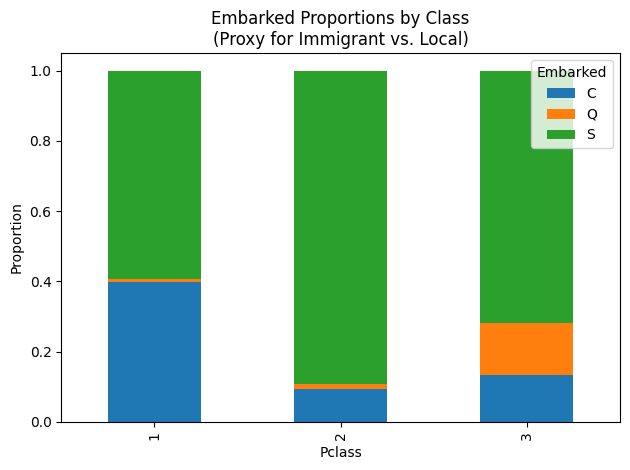

In [15]:

# 1) Pclass × Embarked별 승객 수 집계
embarked_counts = (
    data
    .groupby(['Pclass', 'Embarked'])
    .size()
    .unstack(fill_value=0)
)

# 2) 클래스별 비율 계산
embarked_ratio = embarked_counts.div(embarked_counts.sum(axis=1), axis=0)

# 3) 누적 막대차트 시각화
fig, ax = plt.subplots()
embarked_ratio.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Pclass')
ax.set_ylabel('Proportion')
ax.set_title('Embarked Proportions by Class\n(Proxy for Immigrant vs. Local)')
ax.legend(title='Embarked', loc='upper right')

plt.tight_layout()
plt.show()



# 결론문
3등석의 생존률이 현저히 낮은 점은, 위급 상황에서의 대피 체계가 등급에 따라 비효율적이거나 차별적으로 작동했을 가능성을 시사한다. 따라서 향후 유사한 재난 상황에서는 객실 등급과 무관하게, 모든 승객이 체계적이고 신속하게 대피할 수 있는 대응 매뉴얼의 정비와 훈련이 필요하다.

또한, 만약 해당 사고가 전쟁과 같은 극단적 생존 상황이었다면, 일반적으로 신체적 힘이 강한 남성의 생존률이 높게 나타났을 것이다. 그러나 실제 분석 결과는 여성의 생존률이 더 높게 나타난 바, 이는 ‘여성을 우선 구조하는’ 사회적 선택이 작동했음을 보여준다. 그럼에도 불구하고 남성의 생존률이 지나치게 낮았다는 점은, 구명보트의 수가 전체 탑승 인원을 수용하기에 부족했음을 강하게 시사한다.

따라서 이는 향후 선박 운영 시, 구명보트 수량이 정원의 100% 이상 확보되도록 법적 기준을 강화하고, 실제 탑승 인원이 이를 초과하지 않도록 엄격히 관리하는 제도의 필요성을 제안한다.

# 타이타닉 사례 기반 안전 대피 시스템 제언

---

## 1. 계급 구분 없는 일원화된 대피 프로토콜 수립

**문제점**

* 3등석 승객 생존률(≈25%)이 1·2등석(≈60–80%) 대비 현저히 낮음

**제언**

* 객실 등급과 관계없이 동일한 우선순위의 대피 지시가 내려지도록 매뉴얼 개편
* QR 코드·앱 기반 객실 위치 정보 제공
* 전체 승객에게 “가장 가까운 비상구 → 대피로” 경로를 실시간 안내

---

## 2. 체계적·실시간 승객 현황 모니터링 시스템 구축

**문제점**

* Cabin 정보 누락률 약 77% → 구조 우선순위 판단 혼선

**제언**

* IoT 태그(예: 스마트 팔찌 등)로 객실·데크 위치 자동 추적
* 대피 시점의 승객 분포 시각화 → 고립 가능 구역 조기 식별
* 선실 하층(3등석) 집중 지역에 구조 인력 우선 배치

---

## 3. 구명보트 탑승 용량 법적 재정비

**문제점**

* 전체 승객 대비 구명보트 수 부족 → “여성·어린이 우선” 규칙조차 작동하지 않음

**제언**

* 구명보트 용량 ≥ 총 탑승객 수의 1.5배
* 탑승 전 “최소 탑승 가능 인원” 실시간 점검 의무화
* 정기 안전점검 시 전 객실 무작위 배정으로 보트 탑승 시뮬레이션 실시

---

## 4. 언어·문화 다양성 고려한 안내 체계

**문제점**

* 3등석에는 다국적 이민자 승객이 많아, 안내방송 이해 부족으로 탈출 지연

**제언**

* 승선 시 다국어 안내 앱 제공
* 주요 비상 방송을 영어·한국어·중국어·스페인어 등 다국어로 동시 송출
* 승무원 대상 언어별 비상응대 매뉴얼 정기 교육

---

## 5. 전 승객 대상 정기 비상훈련 및 시뮬레이션

**문제점**

* 초기 혼란 속 승무원과 승객 모두 대피 절차에 익숙치 않음

**제언**

* 항해 시작 전, 전 객실 대상 VR 기반 대피 시뮬레이션 실시
* “여성·어린이 우선”이 아닌 “무조건 빠르게 → 안전구역” 루틴 체득
* 훈련 이수 여부를 승선 자격 요건에 포함

---

## 6. 데이터 기반 후속 모니터링 및 정책 개선

**제언**

* 로지스틱 회귀 등 통계 모델을 활용해 생존 예측 인자를 정기 모니터링
* 사고 발생 시 “데이터 이력 → 정책 반영 → 재시뮬레이션” 순환 프로세스 구축
* 선박마다 지리·기후·탑승 특성을 반영한 맞춤형 대피 매뉴얼 자동 생성
